<a href="https://colab.research.google.com/github/LataData/WineDatasetAnalysis/blob/main/Wine_dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#

In [53]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV

In [3]:
from sklearn.decomposition import PCA

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df=pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Wine_dataset_project/winequality-red.csv')

In [8]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [10]:
df.shape

(1599, 12)

In [11]:
df.isnull().sum().sum()

0

In [12]:
df.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


# Checking for duplicated values and removing them

In [13]:
df.duplicated().sum()

240

In [15]:
df[df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [16]:
df.drop_duplicates(keep='first',inplace=True)

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(1359, 12)

In [19]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Dataset has 6 different quality types of wine**

In [20]:
df.value_counts('quality')

,count
quality,
5,577
6,535
7,167
4,53
8,17
3,10


**converting into binary problem**

In [22]:
wine_dataset=df.copy()
wine_dataset['quality'] = wine_dataset['quality'].apply(lambda x: 1 if x<=5 else 0)

In [23]:
wine_dataset.value_counts('quality')

,count
quality,
0,719
1,640


**Correlation matrix to check relationships between features and quality**

The correlations with quality_class indicate that:

Alcohol has the strongest positive correlation with wine quality (0.48), suggesting higher quality wines tend to have higher alcohol content.

Citric acid and sulphates also show moderate positive correlations.

Volatile acidity (-0.39 and density (-0.184) have the strongest negative correlations, suggesting lower levels of these features are associated with higher quality wines

In [26]:

# correlation matrix to check relationships between features and quality
correlation_matrix = df.corr()

# correlation with the 'quality_class' column
correlation_with_quality = correlation_matrix['quality'].sort_values(ascending=False)
correlation_with_quality



,quality
quality,1.000000
alcohol,0.480343
sulphates,0.248835
citric acid,0.228057
fixed acidity,0.119024
residual sugar,0.013640
free sulfur dioxide,-0.050463
pH,-0.055245
chlorides,-0.130988
total sulfur dioxide,-0.177855


**separate histograms for each unique value of quality, to compare between different quality levels**

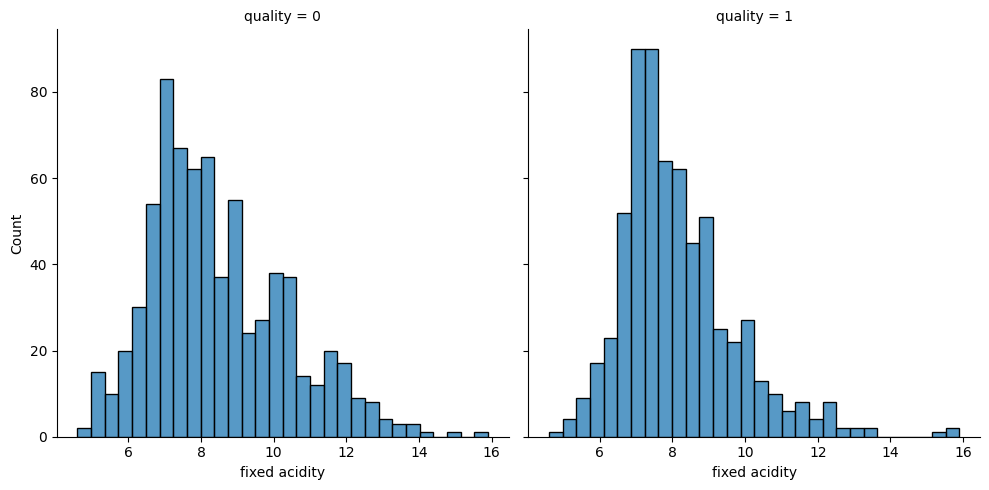

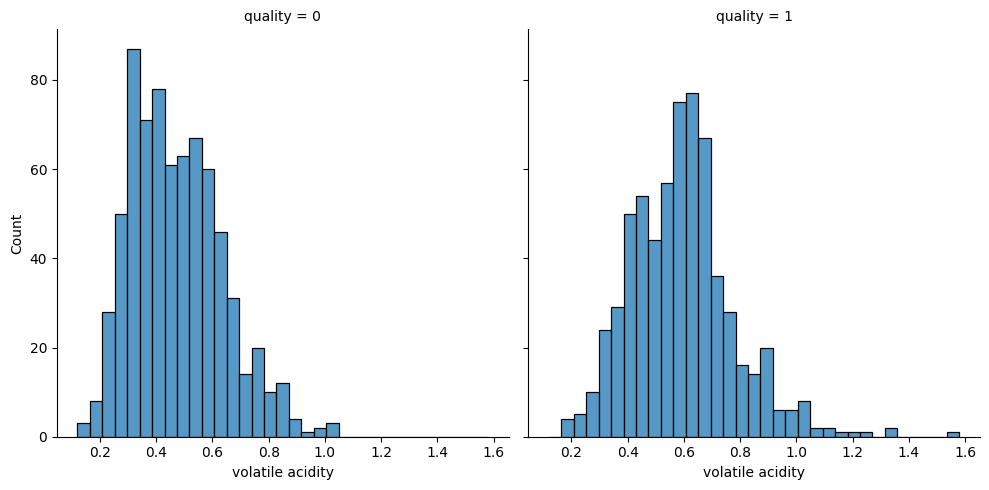

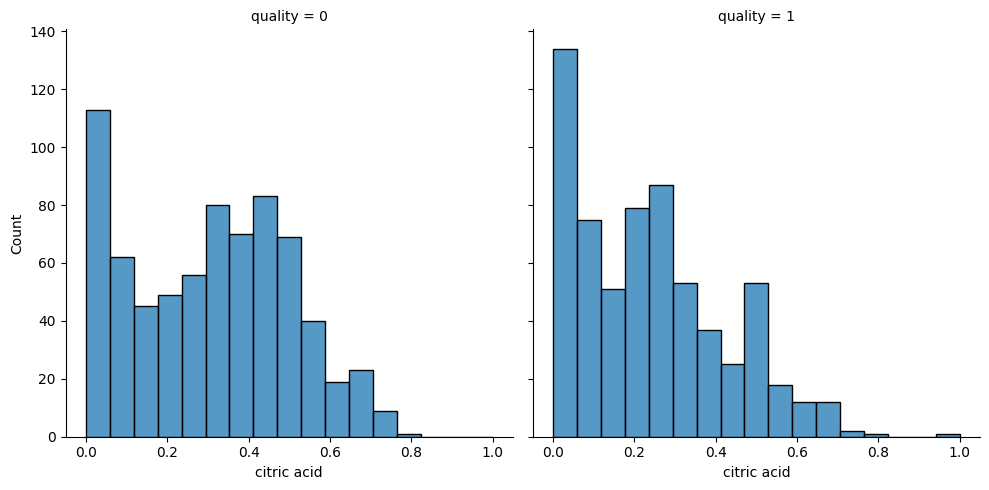

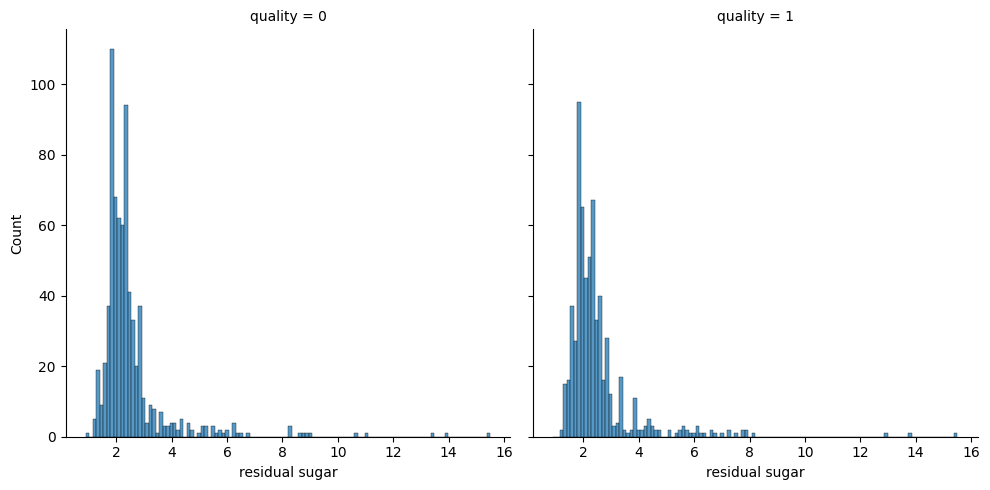

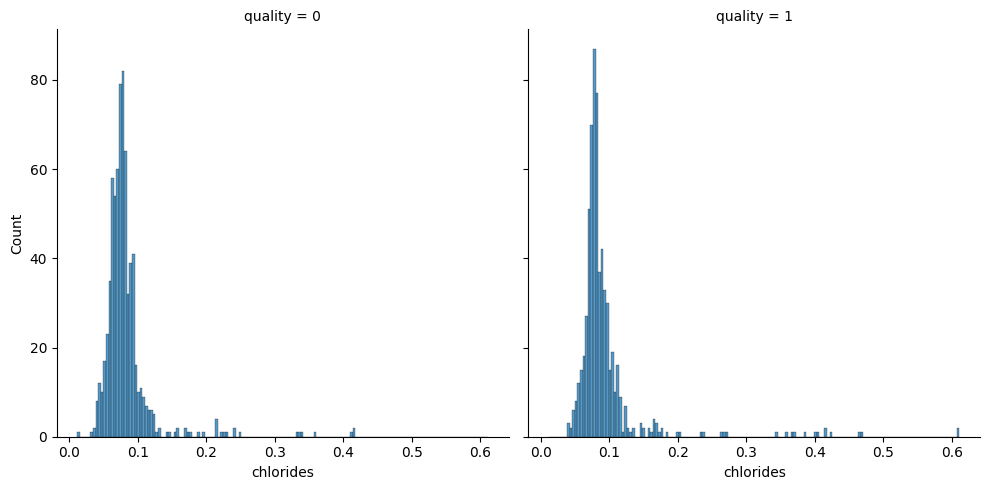

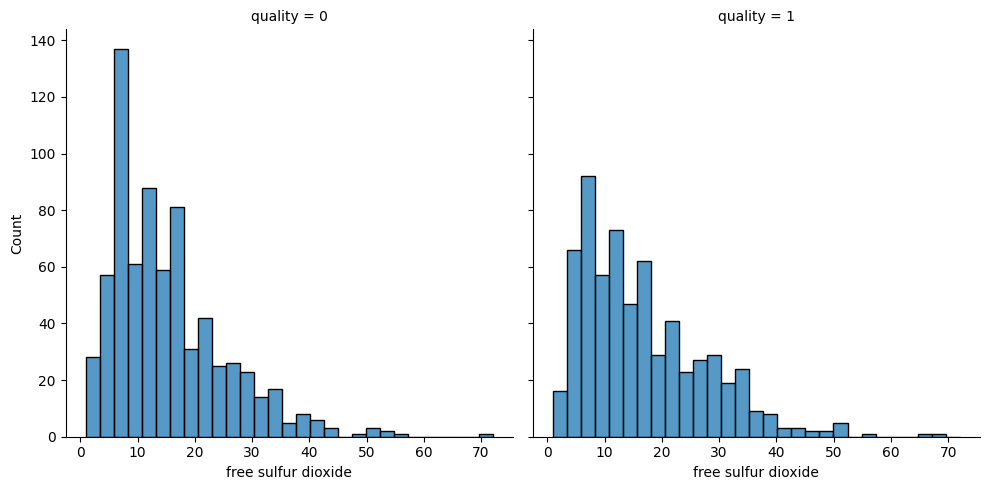

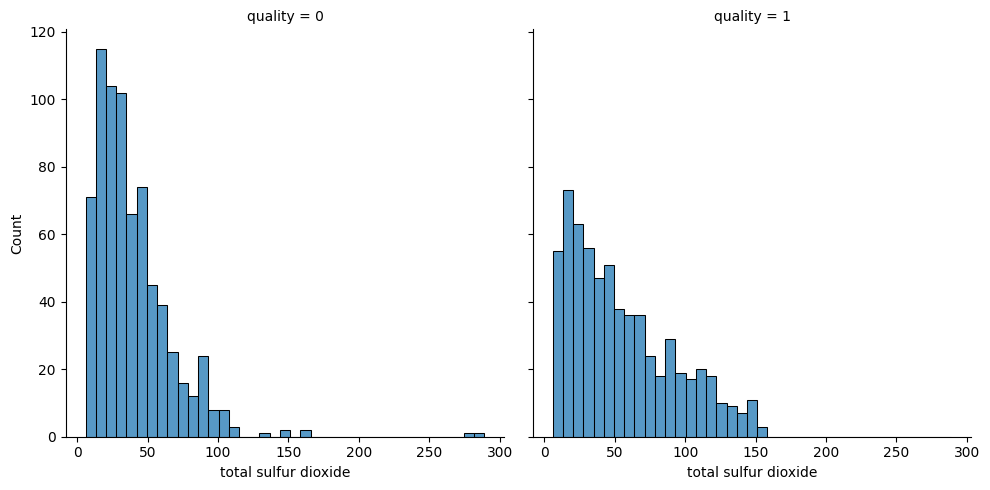

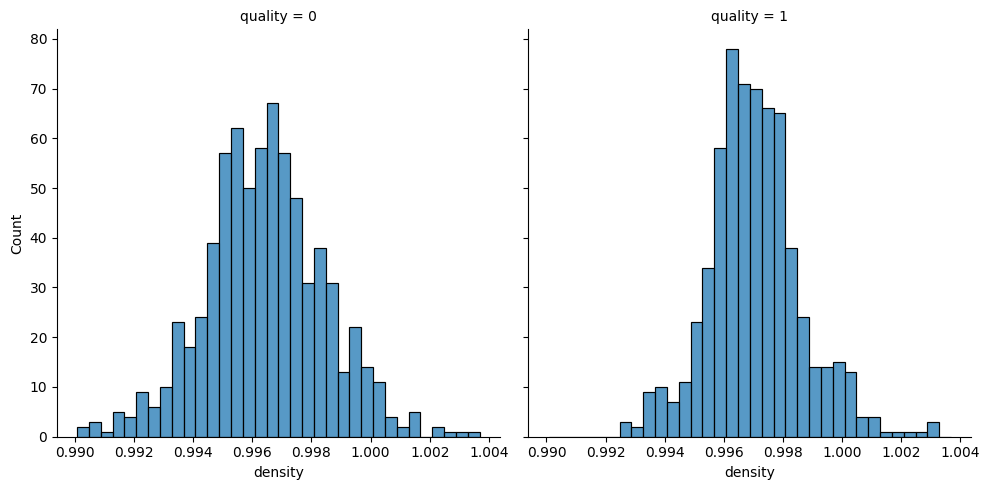

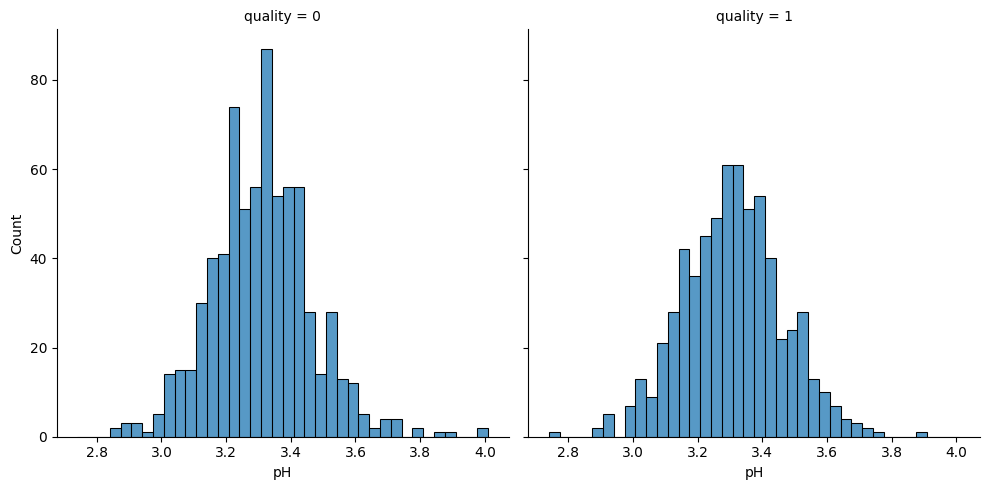

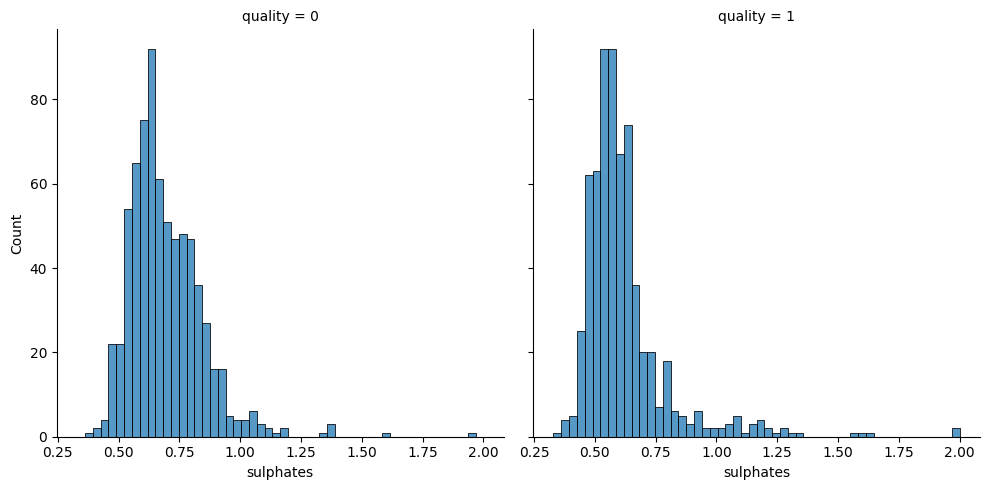

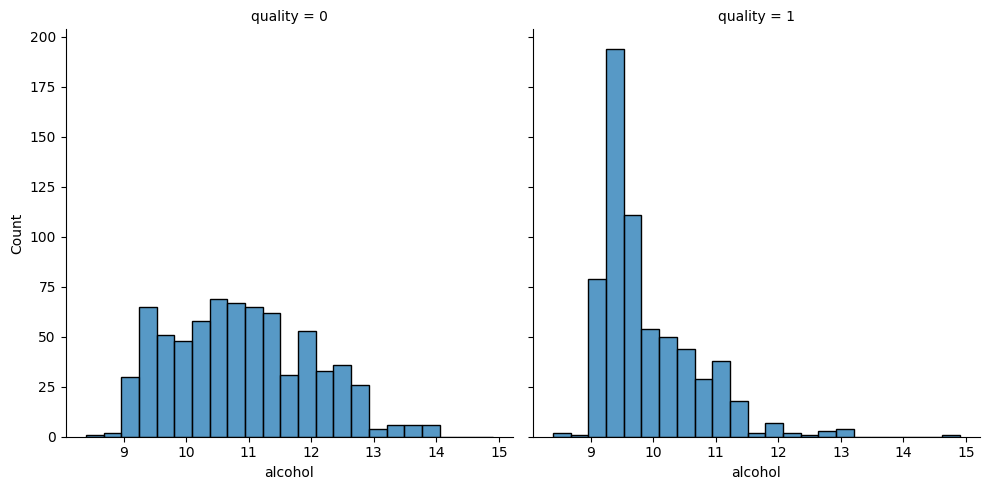

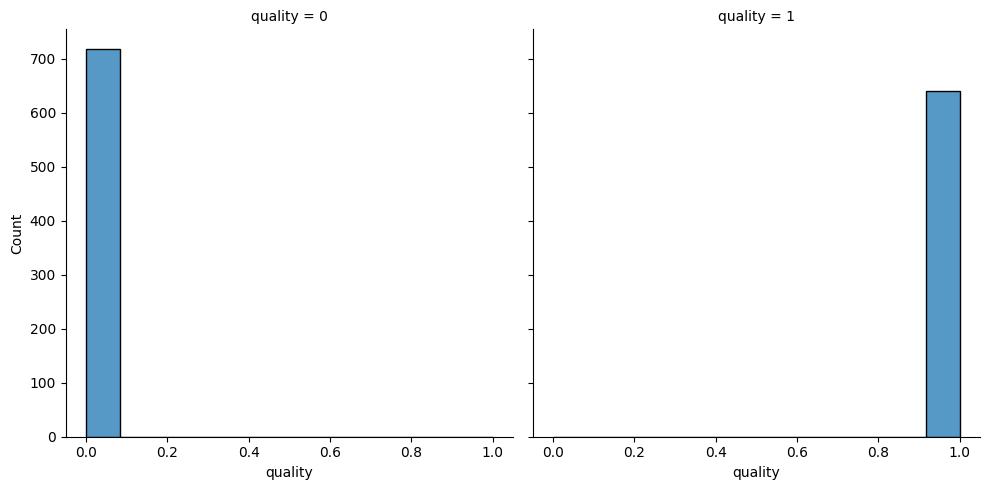

In [27]:
for i in wine_dataset.columns:
  sns.displot(data=wine_dataset , x=i, kind='hist',col='quality')
plt.show()

**Checking outliers and deleting them**

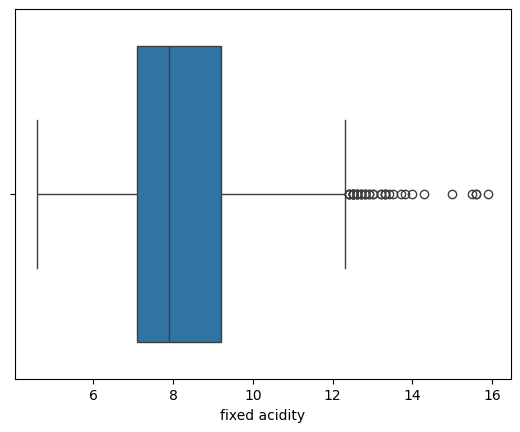

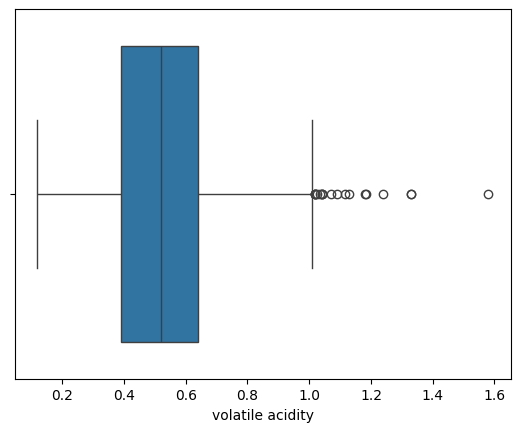

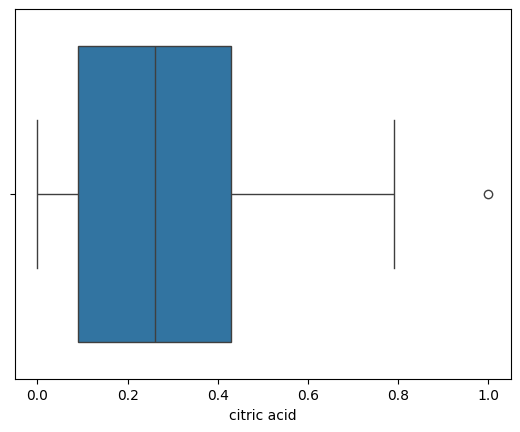

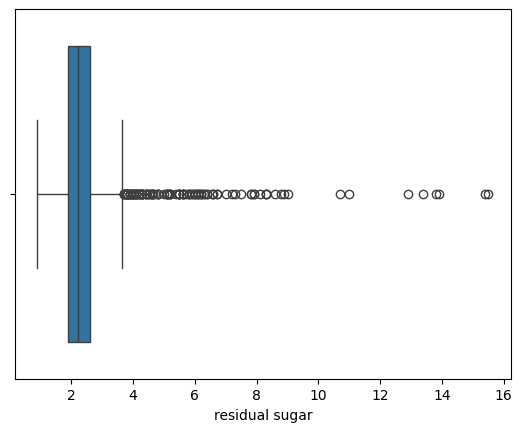

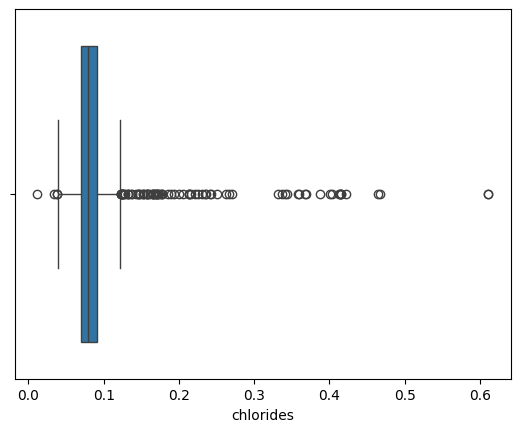

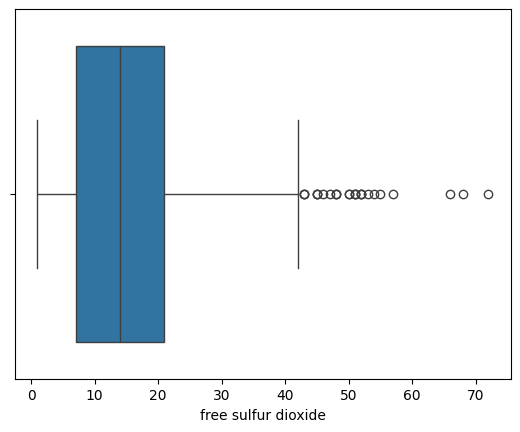

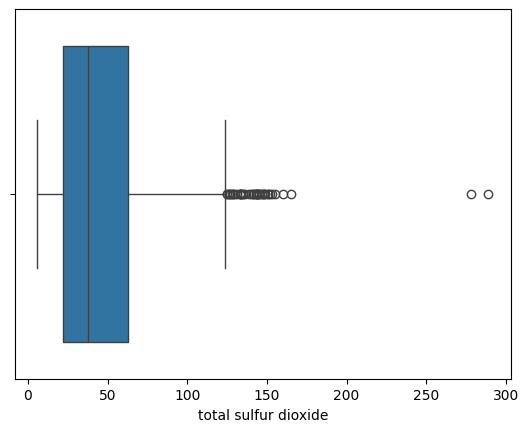

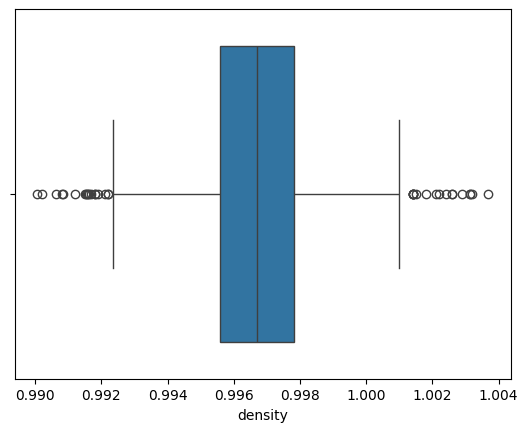

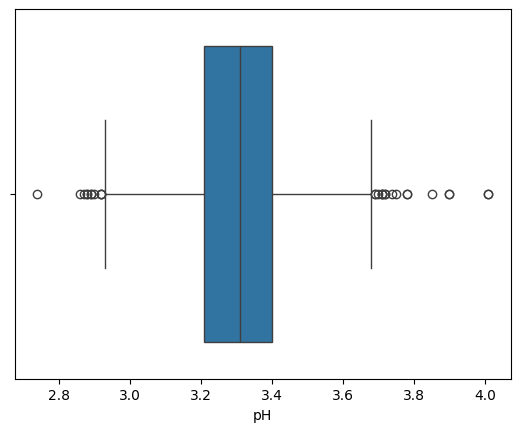

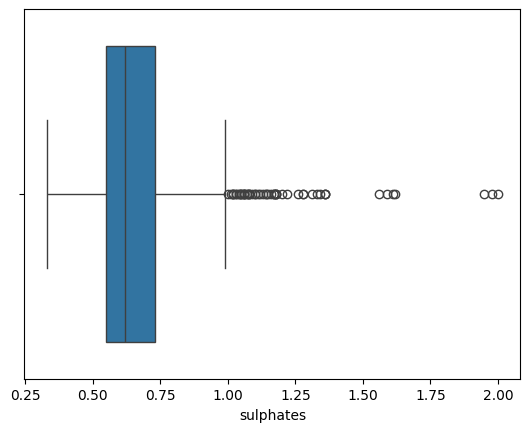

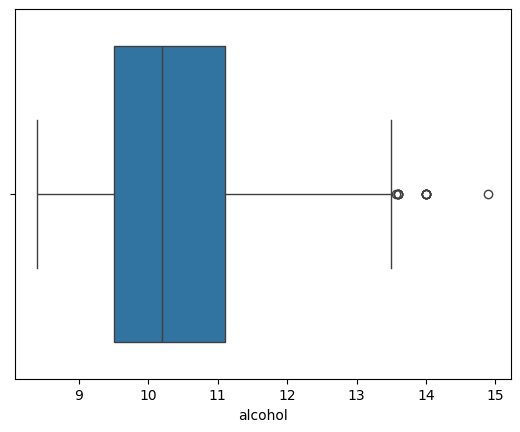

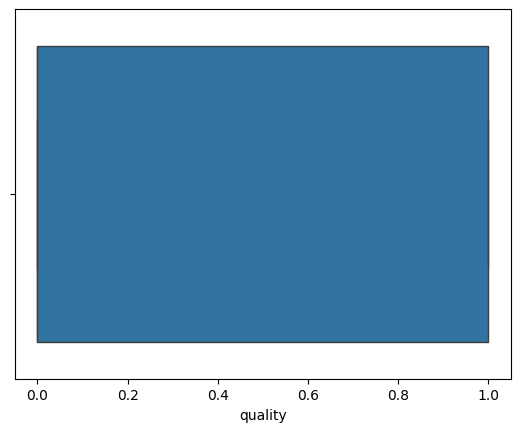

In [35]:
for i in wine_dataset.columns:
  sns.boxplot(data=wine_dataset,x=i)
  plt.show()



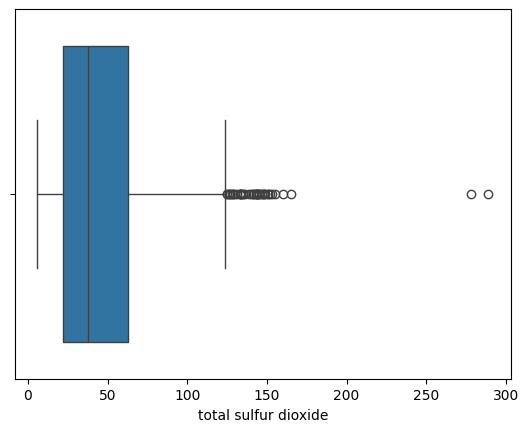

In [ ]:
sns.boxplot(x='total sulfur dioxide',data=wine_dataset)
plt.show()

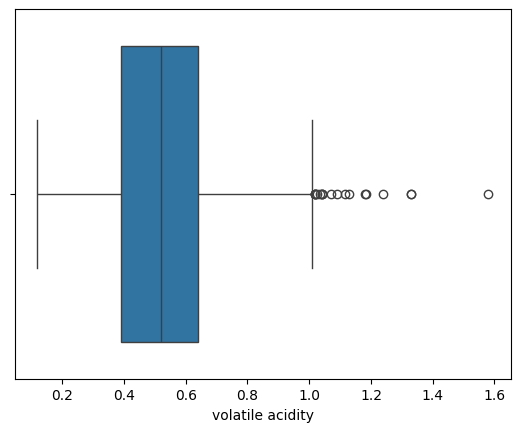

In [ ]:
sns.boxplot(x='volatile acidity',data=wine_dataset)
plt.show()

In [36]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

#  Remove outliers
wine_dataset = remove_outliers(wine_dataset, 'volatile acidity')

In [65]:
wine_dataset = remove_outliers(wine_dataset, 'density')

wine_dataset = remove_outliers(wine_dataset, 'total sulfur dioxide')
wine_dataset = remove_outliers(wine_dataset, 'alcohol')



In [67]:
wine_dataset.shape

(1239, 12)

In [38]:
wine_dataset['quality'].value_counts()

,count
quality,
0,684
1,578


# Split the dataset into features (X) and target (y)

In [39]:
target_column = 'quality'


X = wine_dataset.drop(columns=[target_column])
y = wine_dataset[target_column]

In [40]:
x_pca=X.copy()
y_pca=y.copy()

# Split the data into training and test sets

In [41]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standardization of columns

In [42]:
 #Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)


In [43]:
X_test_scaled.shape

(253, 11)

In [44]:
X_train_scaled.shape

(1009, 11)

#Logistic Regression  71% accuracy


In [45]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test_scaled)

In [46]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[96 34]
 [38 85]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       130
           1       0.71      0.69      0.70       123

    accuracy                           0.72       253
   macro avg       0.72      0.71      0.71       253
weighted avg       0.72      0.72      0.72       253


Accuracy Score:
0.7154150197628458


#PCA

In [48]:
pca = PCA(n_components=10)

# Fit and transform the data to the PCA space
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [49]:
explained_variance = pca.explained_variance_ratio_

In [50]:
print(f'Total explained variance: {explained_variance.sum()}')

Total explained variance: 0.9941718467806421


#Logistic regression after PCA-72%

In [51]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_pca, y_train)

# Predict on the test set
y_pred_pca = log_reg.predict(X_test_pca)

In [52]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_pca))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_pca))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_pca))

Confusion Matrix:
[[97 33]
 [36 87]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       130
           1       0.72      0.71      0.72       123

    accuracy                           0.73       253
   macro avg       0.73      0.73      0.73       253
weighted avg       0.73      0.73      0.73       253


Accuracy Score:
0.7272727272727273


#Decision Tree 70%

In [56]:
from sklearn.tree import DecisionTreeClassifier
# Initialize the decision tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
param_grid = {
    'criterion': ['gini', 'entropy'],              # Split criteria
    'max_depth': [10, 20, 30, 40, 50],       # Depth of the tree
    'min_samples_split': [2, 10, 20],              # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 5, 10],                # Minimum samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2']         # Number of features to consider for best split
}
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# The Best Model and Parameters
best_dt_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Fit the model on the training data
best_dt_model.fit(X_train, y_train)

# Predict on the test data
y_pred_dt = best_dt_model.predict(X_test)

Best Parameters: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 2}


In [57]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_dt))





Confusion Matrix:
[[99 31]
 [43 80]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.76      0.73       130
           1       0.72      0.65      0.68       123

    accuracy                           0.71       253
   macro avg       0.71      0.71      0.71       253
weighted avg       0.71      0.71      0.71       253


Accuracy Score:
0.7075098814229249


In [62]:
from sklearn.svm import SVC
svm_classifier = SVC(random_state=42)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_pca, y_train)
svm_classifier.fit(X_train_pca, y_train)
y_pred_svm = svm_classifier.predict(X_test_pca)
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_svm))


Accuracy Score:
0.7312252964426877


In [63]:
from sklearn.svm import SVC
svm_classifier = SVC(random_state=42)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_svm))


Accuracy Score:
0.5968379446640316


SVC with rbf classifier provide accuracy of 73%